# Import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

# Loading the Data

In [2]:
# Creating columns for data 
attribute_names = (
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'salary-class',

)

In [3]:
# Importing the data 
df = pd.read_csv('adult.data', names=attribute_names, sep=', ', engine='python')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Process the data so it can be modeled

In [5]:
# Deleting unnecessary columns 
excludes = (
    'fnlwgt',
    'education-num',
    'capital-gain',
    'capital-loss',
)
for att in excludes:
    del df[att]
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [7]:
# Converting certain categorical 
booleans = (
    'sex',
    'native-country',
    'salary-class'
)

for att in booleans:
    df[att] = df[att].astype('category')
    df[att] = df[att].cat.codes
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,39,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,39,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,39,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,39,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,5,0


In [8]:
# Turning categoricals into dummie variables
categoricals = (
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race'
)

for att in categoricals:
    df = pd.concat([df, pd.get_dummies(df[att], prefix=att)], axis=1)
    del df[att]
df.head()

,age,sex,hours-per-week,native-country,salary-class,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,1,40,39,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,1,13,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,1,40,39,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,53,1,40,39,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,5,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


# Splitting data into training and test sets 

In [9]:
X = df.drop('salary-class', axis = 1)
y = df['salary-class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [11]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (21815, 62)
X_test (10746, 62)
y_train (21815,)
y_test (10746,)


# Fit a decistion tree to dataset and make predictions 

In [12]:
clf = DecisionTreeClassifier(
    random_state=0,
    criterion='entropy',
)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
y_train_pred = clf.predict(X_train)
print(y_train_pred[0:10])
train_acc = accuracy_score(y_train, y_train_pred)
print('Train:', train_acc )

[0 1 0 0 0 0 0 0 1 0]
Train: 0.9731377492550997


In [14]:
y_test_pred = clf.predict(X_test)
print(y_test_pred[0:10])
test_acc = accuracy_score(y_test, y_test_pred)
print('Test:', test_acc )

[0 0 0 1 0 0 0 0 0 0]
Test: 0.7787083565978038


In [16]:
df['salary-class'].value_counts()

0    24720
1     7841
Name: salary-class, dtype: int64

# Prune Decision Tree to improve accuracy 

min_samples_split =  2
Train: 0.9731377492550997
Test: 0.7787083565978038
min_samples_split =  3
Train: 0.9588815035526014
Test: 0.7846640610459706
min_samples_split =  5
Train: 0.9442126976850791
Test: 0.7877349711520566
min_samples_split =  10
Train: 0.918771487508595
Test: 0.7944351386562442
min_samples_split =  20
Train: 0.893651157460463
Test: 0.8078354736646194
min_samples_split =  50
Train: 0.8680724272289709
Test: 0.8153731621068304
min_samples_split =  100
Train: 0.856429062571625
Test: 0.8237483714870649
min_samples_split =  250
Train: 0.8407059362823746
Test: 0.8238414293690676
min_samples_split =  500
Train: 0.8343800137520055
Test: 0.8238414293690676
min_samples_split =  750
Train: 0.8323630529452212
Test: 0.8248650660710962
min_samples_split =  1000
Train: 0.8292459316983727
Test: 0.8228177926670389
min_samples_split =  2500
Train: 0.8230116892046757
Test: 0.8191885352689373
min_samples_split =  5000
Train: 0.8215906486362594
Test: 0.8188163037409268
min_samples_split =  

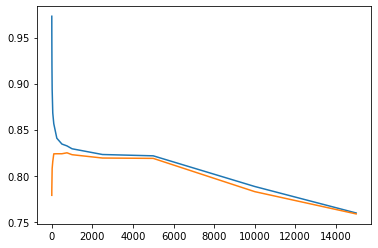

In [17]:
sizes = [2,3,5,10,20,50,100,250,500,750,1000,2500,5000,10000,15000]
train_accs = []
test_accs = []

# Iterating over sizes and printing results for both test and training data 
for s in sizes:
    clf = DecisionTreeClassifier(
        random_state=0,
        criterion='entropy',
        min_samples_split=s
    )
    clf.fit(X_train,y_train)
    
    print('min_samples_split = ', s)
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    print('Train:', train_acc )
    
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    print('Test:', test_acc )
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
# Plotting data from predictions of training and test data 
plt.plot(sizes, train_accs)
plt.plot(sizes, test_accs)
plt.show()

# Graphical representation of Decision Tree

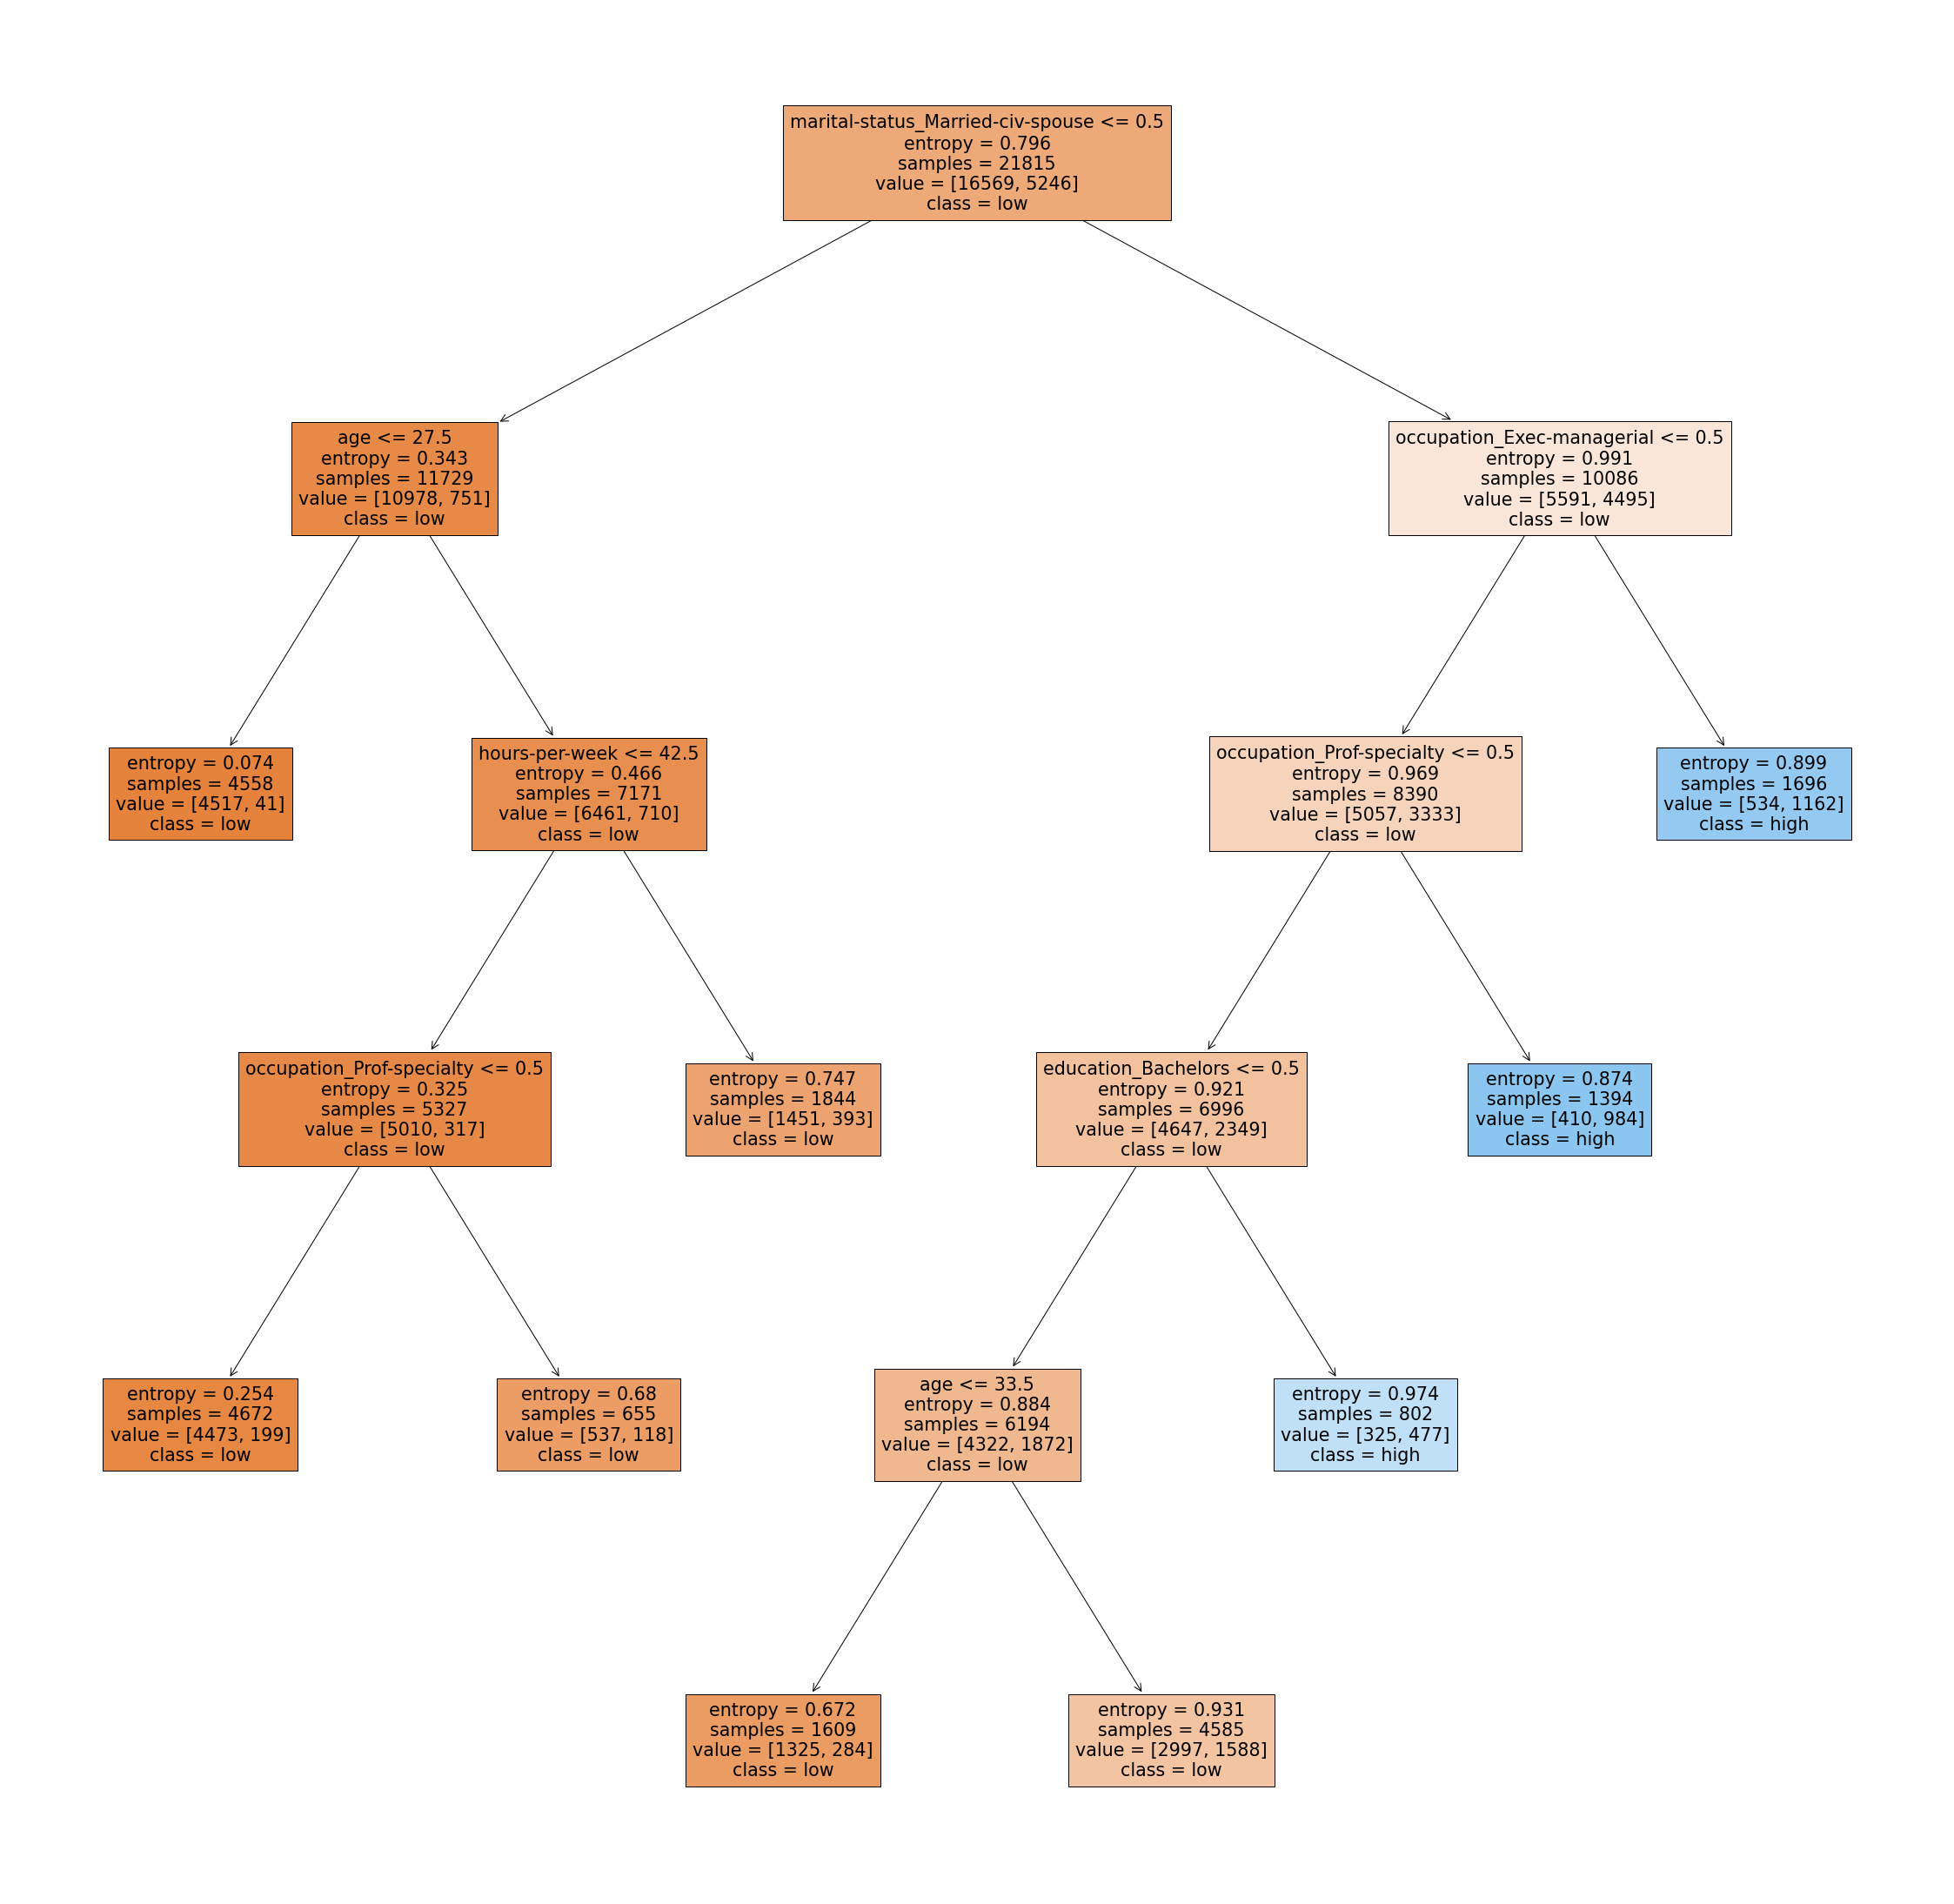

In [18]:
clf = DecisionTreeClassifier(
    random_state=0,
    criterion='entropy',
    min_samples_split=5000
)
clf.fit(X_train, y_train)

# Plotting decision tree 
fig = plt.figure(figsize=(40,40))
p = tree.plot_tree(
    clf,
    filled=True,
    feature_names=X_train.columns.to_list(),
    class_names=('low', 'high')
)